In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import random
import numpy as np

### pandas.Series.str
- s.str.split
- s.str.replace
- s.str.extract

In [ ]:
s = pd.Series('abc_def._ghi_jkl')
print(s)
print(s.str.split('_'))
print(s.str.replace('_',' '))
print(s.str.extract('([A-Za-z]+)\.', expand=False))

0    abc_def._ghi_jkl
dtype: object
0    [abc, def., ghi, jkl]
dtype: object
0    abc def. ghi jkl
dtype: object
0    def
dtype: object


### pandas.Series.map
- 하나씩 꺼내와서 사용
- dictionary나 function이랑 사용할 수 있는데..


In [ ]:
s = pd.Series(['good','soso','bad','soso','good','good'])
score_mapping = {'good':100,'soso':50,'bad':10}
s.map(score_mapping)

0    100
1     50
2     10
3     50
4    100
5    100
dtype: int64

In [ ]:
s.map('I am {}'.format)

0    I am good
1    I am soso
2     I am bad
3    I am soso
4    I am good
5    I am good
dtype: object

### pandas.groupby.transform
- groupby의 결과 중
- 각 sample이 해당하는 결과를 할당해준다.
- missing Value 에 특정값을 할당할때, 전체 근사치를 이용하는 것이 아니라, 특정 그룹의 근사치를 할당하고자 할 때 쓰일 수 있다.


In [ ]:
df = pd.DataFrame({
    "Date": [
        "2015-05-08", "2015-05-07", "2015-05-06", "2015-05-05",
        "2015-05-08", "2015-05-07", "2015-05-06", "2015-05-05"],
    "Data": [5, 8, 6, 1, None, 100, 60, 120],
})
df

,Date,Data
0,2015-05-08,5.0
1,2015-05-07,8.0
2,2015-05-06,6.0
3,2015-05-05,1.0
4,2015-05-08,NaN
5,2015-05-07,100.0
6,2015-05-06,60.0
7,2015-05-05,120.0


In [ ]:
df.groupby('Date')['Data'].mean()

Date
2015-05-05    60.5
2015-05-06    33.0
2015-05-07    54.0
2015-05-08     5.0
Name: Data, dtype: float64

In [ ]:
df['group_mean']=df.groupby('Date')['Data'].transform('mean')
df

,Date,Data,group_mean
0,2015-05-08,5.0,5.0
1,2015-05-07,8.0,54.0
2,2015-05-06,6.0,33.0
3,2015-05-05,1.0,60.5
4,2015-05-08,NaN,5.0
5,2015-05-07,100.0,54.0
6,2015-05-06,60.0,33.0
7,2015-05-05,120.0,60.5


In [ ]:
df['Data'].fillna(df.groupby('Date')['Data'].transform('mean'),inplace=True)

In [ ]:
df

,Date,Data
0,2015-05-08,5.0
1,2015-05-07,8.0
2,2015-05-06,6.0
3,2015-05-05,1.0
4,2015-05-08,5.0
5,2015-05-07,100.0
6,2015-05-06,60.0
7,2015-05-05,120.0


### df.at[index, column] = new_value
- 특정한 value를 변경하고자 할 때

In [ ]:
df

,Date,Data,group_mean
0,2015-05-08,5.0,5.0
1,2015-05-07,8.0,54.0
2,2015-05-06,6.0,33.0
3,2015-05-05,1.0,60.5
4,2015-05-08,5.0,5.0
5,2015-05-07,100.0,54.0
6,2015-05-06,60.0,33.0
7,2015-05-05,120.0,60.5


In [ ]:
df.at[3,'group_mean'] = 999
df

,Date,Data,group_mean
0,2015-05-08,5.0,5.0
1,2015-05-07,8.0,54.0
2,2015-05-06,6.0,33.0
3,2015-05-05,1.0,999.0
4,2015-05-08,5.0,5.0
5,2015-05-07,100.0,54.0
6,2015-05-06,60.0,33.0
7,2015-05-05,120.0,60.5


### FacetGrid and KDE plot
- FacetGrid : seaborn...

In [ ]:
temp1 = random.normal(size=100)
temp2 = random.normal(size=100)
df = pd.DataFrame({
    'Data':np.concatenate([temp1,temp2]),
    'Group':[1 for i in range(100)]+[2 for i in range(100)]
})

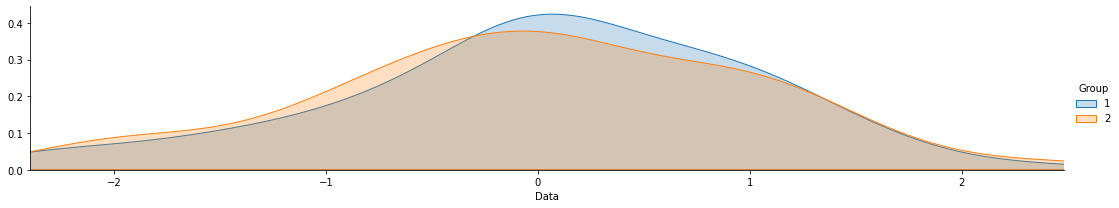

In [ ]:
facet = sns.FacetGrid(df, hue='Group',aspect=5)
facet.map(sns.kdeplot, 'Data', shade=True)
facet.set(xlim=(df['Data'].min(), df['Data'].max()))
facet.add_legend()

plt.show()

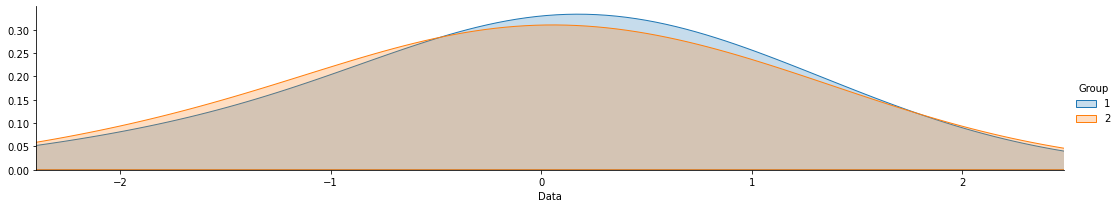

In [ ]:
facet = sns.FacetGrid(df, hue='Group',aspect=5)
facet.map(sns.kdeplot, 'Data', shade=True, bw_adjust=2)
facet.set(xlim=(df['Data'].min(), df['Data'].max()))
facet.add_legend()

plt.show()

(-2.0, 2.4824850000410015)

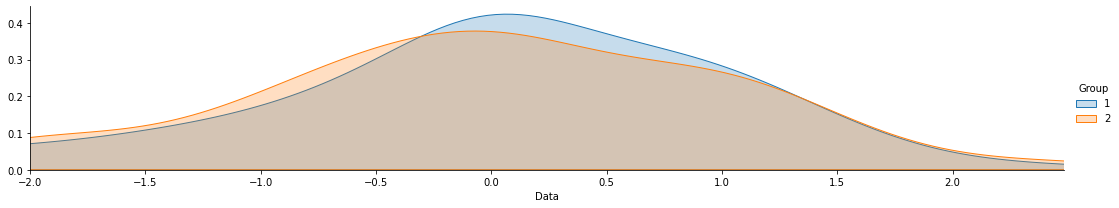

In [ ]:
facet = sns.FacetGrid(df, hue='Group',aspect=5)
facet.map(sns.kdeplot, 'Data', shade=True)
facet.set(xlim=(df['Data'].min(), df['Data'].max()))
facet.add_legend()
plt.xlim(-2,)

(0.0, 1.0)

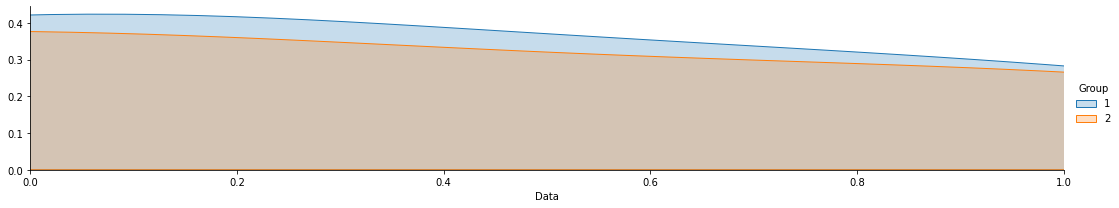

In [ ]:
facet = sns.FacetGrid(df, hue='Group',aspect=5)
facet.map(sns.kdeplot, 'Data', shade=True)
facet.set(xlim=(df['Data'].min(), df['Data'].max()))
facet.add_legend()
plt.xlim(0,1)

### bar_char for Exploratory Data Analysis

In [ ]:
temp1 = [1,1,1,3,3,3,2,2,2,2,1,1,1,1,1,3,3,3,3,3]
df = pd.DataFrame({
    'Data':temp1,
    'Group':[1 for i in range(10)]+[2 for i in range(10)]
})

def bar_char(dataset, feature):
  temp_s = dataset[dataset['Group']==1][feature].value_counts()
  temp_d = dataset[dataset['Group']==2][feature].value_counts()
  df = pd.DataFrame([temp_s, temp_d])
  df.index=['Yes', 'No']
  df.plot(kind='bar',stacked=True,figsize=(10,5))

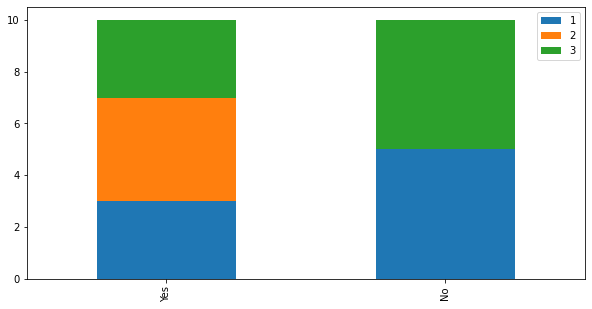

In [ ]:
bar_char(df,'Data')

### loc, iloc
- loc : index를 사용해서
- iloc : 행 번호를 사용해서 조회

특정 condition을 만족하는 df를 조회, 편집하고자 할 때
- df[df.column > condition].column = new_value<br>
하면 에러가난다. 이럴때, 
- df.loc[df.column > condition, 'column'] = new_value<br>
로 편집할 수 있다.
- Condition (True/False)를 저장해두고 loc으로 계속 써먹을 수 있다.
- isnull() 같은 것도 loc이랑 사용하면 조회가 쉬워진다.

- df = reviews.loc[[0,1,10,100],['country','province','region_1','region_2']]

In [ ]:
df.index = [char for char in 'abcdefghijklmnopqrst']
df

,Data,Group
a,1,1
b,1,1
c,1,1
d,3,1
e,3,1
f,3,1
g,2,1
h,2,1
i,2,1
j,2,1


In [ ]:
print(df.loc[['j','s']])
print(df.iloc[1:10])

   Data  Group
j     2      1
s     3      2
   Data  Group
b     1      1
c     1      1
d     3      1
e     3      1
f     3      1
g     2      1
h     2      1
i     2      1
j     2      1


In [ ]:
df[df['Data']<2]['Data'] = 0
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Data,Group
a,1,1
b,1,1
c,1,1
d,3,1
e,3,1


In [ ]:
df.loc[df['Data']<2,'Data'] = 0
df.head()

,Data,Group
a,0,1
b,0,1
c,0,1
d,3,1
e,3,1


In [ ]:
group_1 = df.Group==1
df[group_1]

,Data,Group
a,1,1
b,1,1
c,1,1
d,3,1
e,3,1
f,3,1
g,2,1
h,2,1
i,2,1
j,2,1


In [ ]:
df[~group_1]

,Data,Group
k,1,2
l,1,2
m,1,2
n,1,2
o,1,2
p,3,2
q,3,2
r,3,2
s,3,2
t,3,2


### find specific 'word' in text
- Use re
- Extract word
- Check url

In [ ]:
import re

In [ ]:
pattern = '[#]'
text = 'abc d#ef #ghi jkl'
print(re.findall(pattern,text))

['#', '#']


In [ ]:
pattern = r'(https?://[^\s]+)'
text1 = 'abc def plz visit https://google.com'
text2 = 'abc def welcome'
text3 = 'abc def plz visit https://google.com http://naver.com www.yahoo.co.jp'
print(re.findall(pattern,text1))
print(re.findall(pattern,text2))
print(re.findall(pattern,text3))

['https://google.com']
[]
['https://google.com', 'http://naver.com']


In [ ]:
re.sub(pattern,' ',text3)

'abc def plz visit     www.yahoo.co.jp'

### idxmax
- bargain_wine = reviews.loc[(reviews.points/reviews.price).idxmax(),'title']
- 

### function with apply

In [ ]:
def stars(row):
    if row.country == 'Canada':
        return 3
    elif row.points >= 95:
        return 3
    elif row.points >= 85:
        return 2
    else:
        return 1

star_ratings = reviews.apply(stars, axis='columns')

NameError: ignored

### groupby 
- reviews.groupby('winery').apply(lambda df: df.title.iloc[0])
  - winery 그룹으로 묶으면, 같은 winery 정보끼리 묶인 작은 테이블이 생긴다.
  - df 작은 테이블에서 title column만 가져오고,
  - 첫번째 항만 출력

- reviews.groupby(['country', 'province']).apply(lambda df: df.loc[df.points.idxmax()])
  - country 로 한번 그룹핑되고, province로 한번더 그룹핑된 작은 테이블들이 생긴다.
  - 그 테이블 안에서 Point.idxmax를 차지하는 데이터를 출력한다.

- reviews.groupby(['country']).price.agg([len, min, max])
  - agg(): 여러개의 함수를 동시에 실행한다.
  - country별로 나눠진 여러 df에 대해서
  - price 칼럼만 분리한 뒤
  - len, min, max를 출력

### multi_index and sort_values()
- countries_reviewed = reviews.groupby(['country', 'province']).description.agg([len])
  - 두개의 columns에 대해서 작은 표들이 만들어지는데,
  - description 정보만 가져와서, 길이를 출력한다.
  - :: 나라/지역별로 몇개의 description이 있는지 알 수 있다.

- countries_reviewed = countries_reviewed.reset_index()
  - multi_index 이기 때문에, 인덱스가 리스트처럼 된다. ['country','province]
  - 잘게 나눠진 새로운 index가 된다.

- countries_reviewed.sort_values(by='len')
  - 인덱스 2개, len이라는 col을 가진 테이블인데,
  - len을 기준으로 정렬할 수 있다.
  - countries_reviewed.sort_values(by='len', ascending=False)
  - countries_reviewed.sort_index()

### astype()
- reviews.points.astype('float64')
  - dtype 을 바꿀 수 있다.

### replace
- reviews.taster_twitter_handle.replace("@kerinokeefe", "@kerino")
  - fillna의 대체로 사용될 수 있다.

### rename column, index name And combine dataframes
- reviews.rename(columns={'points': 'score'})
- reviews.rename(index={0: 'firstEntry', 1: 'secondEntry'})
  - using rename index is very rarely, but
  - set_index(rename index with column data) is used ofthen.


### concat : smush all dataset elements along an axis
- When we have different dataset like, Youtube dataset from UK and US,
- but they have same columns
- pd.concat([df_UK, df_US])

### join
- left = canadian_youtube.set_index(['title', 'trending_date'])
- right = british_youtube.set_index(['title', 'trending_date'])

- left.join(right, lsuffix='_CAN', rsuffix='_UK')

  - df_ans = powerlifting_competitors.set_index('MeetID').join(powerlifting_meets.set_index('MeetID'),on='MeetID')


### Normalize Dataset
- int, float, bool ...
- Mean / minmax
  - (df_temp-df_temp.mean())/df_temp.std()
  - (df_temp-df_temp.min())/(df_temp.max()-df_temp.min())

### datetime to index >> count index before the date
- using rolling


    launched = pd.Series(ks.index, index=ks.launched, name="count_7_days").sort_index()
    launched.head(20)
    
    count_7_days = launched.rolling('7d').count() - 1
    print(count_7_days.head(20))

    # Ignore records with broken launch dates
    plt.plot(count_7_days[7:]);
    plt.title("Number of projects launched over periods of 7 days");

### sort dictionary
- sorted(num_unique_value.items(), key=lambda x: x[1])

In [ ]:
sorted(num_unique_value.items(), key=lambda x: x[1])

NameError: ignored

## Data Preprocessing (Categorical Numerical 컬럼 나누기)


In [ ]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if
                    X_train_full[cname].nunique() < 10 and 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector

X = fuel.copy()
# Remove target
y = X.pop('FE')

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y)

## Drop rows having missing variable in target column

In [ ]:
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)

## Data quary for removing the rows having outlier

In [ ]:
# Remove data with extreme outlier coordinates or negative fares
data = data.query('pickup_latitude > 40.7 and pickup_latitude < 40.8 and ' +
                  'dropoff_latitude > 40.7 and dropoff_latitude < 40.8 and ' +
                  'pickup_longitude > -74 and pickup_longitude < -73.9 and ' +
                  'dropoff_longitude > -74 and dropoff_longitude < -73.9 and ' +
                  'fare_amount > 0'
                  )

## Setting matplot default


In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)


## Subplot and images


In [ ]:
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
plt.title('Without BatchNormalization')
img = mpimg.imread('data/BN_0.png')
plt.imshow(img)

plt.subplot(3,2,2)
plt.title('1 BatchNormalization')
img = mpimg.imread('data/BN_1.png')
plt.imshow(img)

plt.subplot(3,2,3)
plt.title('2 BatchNormalization')
img = mpimg.imread('data/BN_2.png')
plt.imshow(img)

plt.subplot(3,2,4)
plt.title('3 BatchNormalization')
img = mpimg.imread('data/BN_3.png')
plt.imshow(img)

plt.subplot(3,2,(5,6))
plt.title('4 BatchNormalization')
img = mpimg.imread('data/BN_4.png')
plt.imshow(img,aspect='auto')
plt.show()